In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import kala

import networkx as nx
import pandas as pd
import numpy as np

from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from kala.models.shocks import RemovePlayer, RemoveRandomPlayer, RemoveEdge, SwapRandomEdge, RemoveRandomEdge

In [4]:
from helper_functions import helper_diagonal_sbm
from main_functions import montecarlo_game_network, montecarlo_game_sbm

# How shocks impact the population of savers?

### We first start by setting up the constant parameters

In [5]:
## These are the constants not refering to the interactions

num_players = 50
num_steps = 200
num_simulations = 3

# number of initial proportion of savers
threshold = 0.5

In [6]:
## These are the constants refering to the interactions

# How much more do savers win when interacting with another
differential_efficient = 0.3
# How much do savers lose when interacting with a non-saver
differential_inefficient = 0.5

# Number of games that players save in their memory
memory_length = 4
# Memory rule
update_rule = kala.models.memory_rules.AllPastMemoryRule()

# Standard deviation of log normal distribution
def standard_deviation(eta):
    return eta**2


In [7]:
## This is the network that we are going to use

# SBM network
g, pos = helper_diagonal_sbm(num_players, p_off=0.1)

# Scale-free network
#m = np.random.randint(1, num_players)
#g = nx.barabasi_albert_graph(num_players, m)

### Shocks

In [23]:
shocks = [[] for _ in range(num_steps)]

## We can choose in which step and how many shocks we want

t1, t2, t3, t4, t5, t6 = np.random.randint(0, high=num_steps, size=6, dtype=int)

random_players = np.random.randint(0, high=num_players, size=3, dtype=int)

shocks[t1].append(RemoveEdge(u=random_players[0], v=random_players[1]))

shocks[t3].append(RemoveRandomEdge(rng=0))


shocks[t5].append(SwapRandomEdge(rng=0))

shocks[t6].append(SwapRandomEdge())
shocks[t6].append(RemoveRandomEdge())


  0%|          | 0/3 [00:00<?, ?it/s]

swapping edge: (InvestorAgent(unl6xC), InvestorAgent(cqKEcD)) -> (InvestorAgent(unl6xC), InvestorAgent(kUOQa6))
removing edge (InvestorAgent(jEA9l5), InvestorAgent(iw0Hyu))
removing edge (InvestorAgent(jaOLsQ), InvestorAgent(rHXEh2))
removing edge (40, 40)
swapping edge: (InvestorAgent(jaOLsQ), InvestorAgent(dkuQzv)) -> (InvestorAgent(jaOLsQ), InvestorAgent(sv4BK8))


 33%|███▎      | 1/3 [00:00<00:00,  2.31it/s]

swapping edge: (InvestorAgent(xe3dkA), InvestorAgent(ryEbVB)) -> (InvestorAgent(xe3dkA), InvestorAgent(zAY8rs))
removing edge (InvestorAgent(nKjPrG), InvestorAgent(queazC))
removing edge (InvestorAgent(gAcyhF), InvestorAgent(mJbcph))
removing edge (40, 40)
swapping edge: (InvestorAgent(ma5Lxh), InvestorAgent(dDw7EI)) -> (InvestorAgent(ma5Lxh), InvestorAgent(nKjPrG))


 67%|██████▋   | 2/3 [00:00<00:00,  2.35it/s]

swapping edge: (InvestorAgent(zBkXdU), InvestorAgent(kA4nMy)) -> (InvestorAgent(zBkXdU), InvestorAgent(moIxgk))
removing edge (InvestorAgent(wY6eXB), InvestorAgent(moIxgk))
removing edge (InvestorAgent(eQ4edg), InvestorAgent(zBkXdU))
removing edge (40, 40)
swapping edge: (InvestorAgent(by8WCO), InvestorAgent(zPT0Ce)) -> (InvestorAgent(by8WCO), InvestorAgent(nkTYQe))


100%|██████████| 3/3 [00:01<00:00,  2.34it/s]


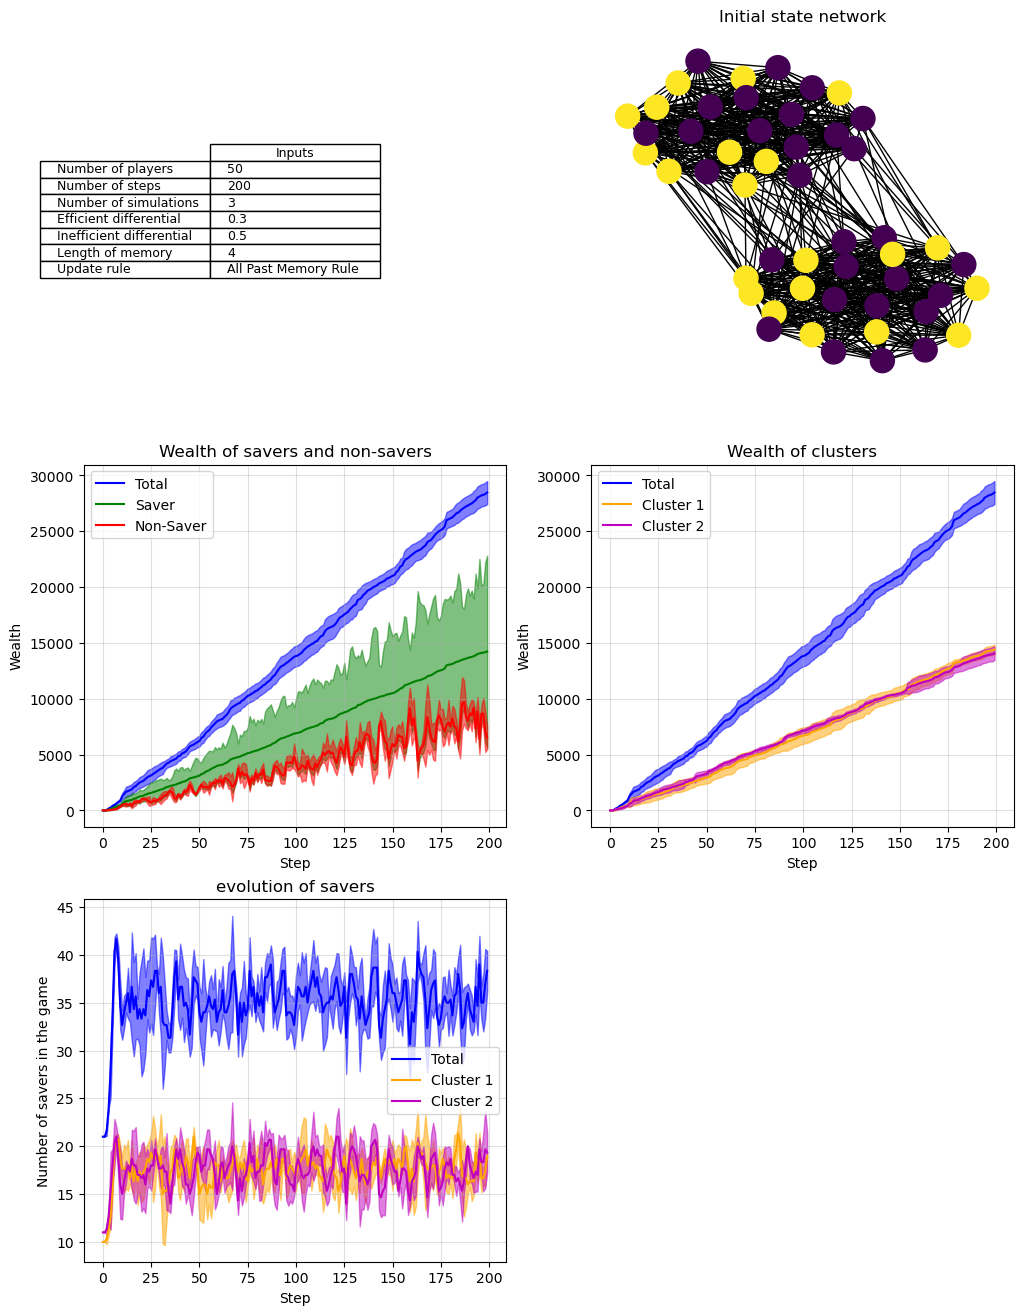

In [24]:
# If SBM
montecarlo_game_sbm(
# If another network, comment above and uncomment below
#montecarlo_game_network(g
    num_steps,
    num_simulations,
    num_players,
    threshold,
    differential_efficient,
    differential_inefficient,
    standard_deviation,
    memory_length,
    update_rule,
    shocks,
    )